In [1]:
import pandas as pd
import numpy as np

In [2]:
rec_data = pd.read_csv("C:/Users/anime/Downloads/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

In [367]:
rec_data.shape

(25835, 62)

In [3]:
rec_data.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [4]:
rec_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [5]:
rec_data['Gender']

0        M
1        M
2        M
3        M
4        M
        ..
25830    M
25831    M
25832    M
25833    F
25834    M
Name: Gender, Length: 25835, dtype: object

In [6]:
gender_encode = pd.get_dummies(rec_data['Gender'])

In [7]:
gender_encode.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
rec_data = rec_data.drop('Gender',axis=1)

In [9]:
rec_data = rec_data.join(gender_encode)

In [10]:
rec_data.head()

,ID,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,F,M
0,1,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,...,0.488562,0.447610,False,False,False,False,False,1,0,1
1,2,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,0.425234,2.000000,False,True,False,False,True,1,0,1
2,3,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,...,0.000000,0.000000,False,True,False,True,False,1,0,1
3,4,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,...,1.000000,0.718996,False,False,False,False,False,1,0,1
4,5,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,...,0.203562,0.929389,False,True,True,False,False,1,0,1


In [11]:
rec_data.rename(columns={'F': 'Female', 'M': 'Male'}, inplace=True)

In [12]:
rec_data.columns

Index(['ID', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated',
       'Supervision_Risk_Score_First', 'Supervision_Level_First',
       'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years',
       'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd',
       'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property',
       'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Conditi

In [13]:
rec_data.describe()

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Training_Sample,Female,Male
count,25835.000000,25835.000000,25360.000000,19732.000000,20663.000000,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835.000000,25835.000000,25835.000000
mean,13314.004838,12.361796,6.082216,93.890044,0.063350,0.013741,0.012890,0.00755,0.482331,0.769295,0.697813,0.122586,0.877414
std,7722.206327,7.133742,2.381442,117.169847,0.138453,0.061233,0.060581,0.04115,0.425004,0.813787,0.459215,0.327967,0.327967
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6626.500000,6.000000,4.000000,28.837366,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13270.000000,12.000000,6.000000,55.424812,0.000000,0.000000,0.000000,0.00000,0.475728,0.635217,1.000000,0.000000,1.000000
75%,20021.500000,18.000000,8.000000,110.333333,0.071429,0.000000,0.000000,0.00000,0.969325,1.000000,1.000000,0.000000,1.000000
max,26761.000000,25.000000,10.000000,1088.500000,1.000000,1.000000,1.000000,1.00000,1.000000,8.000000,1.000000,1.000000,1.000000


In [14]:
rec_data = rec_data.drop('Female', axis=1)

In [15]:
rec_data.head()

,ID,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male
0,1,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,...,0.0,0.488562,0.447610,False,False,False,False,False,1,1
1,2,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,0.0,0.425234,2.000000,False,True,False,False,True,1,1
2,3,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,...,0.0,0.000000,0.000000,False,True,False,True,False,1,1
3,4,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,...,0.0,1.000000,0.718996,False,False,False,False,False,1,1
4,5,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,...,0.0,0.203562,0.929389,False,True,True,False,False,1,1


In [16]:
rec_data = rec_data.drop('ID', axis = 1)

In [17]:
rec_data.head()

,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,...,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male
0,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,...,0.0,0.488562,0.447610,False,False,False,False,False,1,1
1,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,...,0.0,0.425234,2.000000,False,True,False,False,True,1,1
2,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,...,0.0,0.000000,0.000000,False,True,False,True,False,1,1
3,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,...,0.0,1.000000,0.718996,False,False,False,False,False,1,1
4,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,...,0.0,0.203562,0.929389,False,True,True,False,False,1,1


In [18]:
rec_data['Race'].unique()

array(['BLACK', 'WHITE'], dtype=object)

In [19]:
race_encoded = pd.get_dummies(rec_data['Race'])

In [20]:
race_encoded.head()

,BLACK,WHITE
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [21]:
rec_data = rec_data.drop('Race', axis=1)

In [22]:
rec_data = rec_data.join(race_encoded)

In [23]:
rec_data = rec_data.drop('BLACK', axis = 1)

In [24]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,...,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE
0,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,...,0.488562,0.447610,False,False,False,False,False,1,1,0
1,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,...,0.425234,2.000000,False,True,False,False,True,1,1,0
2,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,...,0.000000,0.000000,False,True,False,True,False,1,1,0
3,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,...,1.000000,0.718996,False,False,False,False,False,1,1,1
4,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,...,0.203562,0.929389,False,True,True,False,False,1,1,1


In [25]:
rec_data['Age_at_Release'].unique()

array(['43-47', '33-37', '48 or older', '38-42', '18-22', '23-27',
       '28-32'], dtype=object)

In [26]:
rec_data['Age_at_Release'] = rec_data['Age_at_Release'].replace(['43-47', '33-37', '48 or older', 
                                                                '38-42', '18-22', '23-27', '28-32'], [45,35,50,40,20,25,30])

In [27]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,...,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE
0,45,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,...,0.488562,0.447610,False,False,False,False,False,1,1,0
1,35,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,...,0.425234,2.000000,False,True,False,False,True,1,1,0
2,50,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,...,0.000000,0.000000,False,True,False,True,False,1,1,0
3,40,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,...,1.000000,0.718996,False,False,False,False,False,1,1,1
4,35,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,...,0.203562,0.929389,False,True,True,False,False,1,1,1


In [28]:
rec_data.shape

(25835, 53)

In [29]:
rec_data['Gang_Affiliated'].unique()

array([False, nan, True], dtype=object)

In [30]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int64  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  object 
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Supervision_Level_First                            24115 non-null  object 
 5   Education_Level                                    25835 non-null  object 
 6   Dependents                                         25835 non-null  object 
 7   Prison_Offense                                     22558 non-null  object 
 8   Prison_Years                                       25835 non-null  object 
 9   Prior_

In [31]:
rec_data['Gang_Affiliated'] = rec_data['Gang_Affiliated'].replace([True, False], [1,0])

In [32]:
rec_data['Gang_Affiliated'].max()

1.0

In [33]:
rec_data['Supervision_Level_First'].unique()

array(['Standard', 'Specialized', 'High', nan], dtype=object)

In [34]:
supervision_encoding = pd.get_dummies(rec_data['Supervision_Level_First'])

In [35]:
supervision_encoding.rename(columns= {'High': 'High Supervision', 'Specialized': 'Specialized Supervision', 'Standard': 'Standard Supervision'}, inplace = True)

In [36]:
supervision_encoding

,High Supervision,Specialized Supervision,Standard Supervision
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
25830,0,0,1
25831,0,0,1
25832,0,0,1
25833,0,0,1


In [37]:
rec_data = rec_data.join(supervision_encoding)

In [38]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,...,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE,High Supervision,Specialized Supervision,Standard Supervision
0,45,16,0.0,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,...,False,False,False,False,1,1,0,0,0,1
1,35,16,0.0,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,...,True,False,False,True,1,1,0,0,1,0
2,50,24,0.0,7.0,High,At least some college,3 or more,Drug,1-2 years,6,...,True,False,True,False,1,1,0,1,0,0
3,40,16,0.0,7.0,High,Less than HS diploma,1,Property,1-2 years,8,...,False,False,False,False,1,1,1,1,0,0
4,35,16,0.0,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,...,True,True,False,False,1,1,1,0,1,0


In [39]:
rec_data = rec_data.drop('Supervision_Level_First', axis=1)

In [40]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,...,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE,High Supervision,Specialized Supervision,Standard Supervision
0,45,16,0.0,3.0,At least some college,3 or more,Drug,More than 3 years,6,6 or more,...,False,False,False,False,1,1,0,0,0,1
1,35,16,0.0,6.0,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,...,True,False,False,True,1,1,0,0,1,0
2,50,24,0.0,7.0,At least some college,3 or more,Drug,1-2 years,6,6 or more,...,True,False,True,False,1,1,0,1,0,0
3,40,16,0.0,7.0,Less than HS diploma,1,Property,1-2 years,8,6 or more,...,False,False,False,False,1,1,1,1,0,0
4,35,16,0.0,4.0,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,...,True,True,False,False,1,1,1,0,1,0


In [41]:
rec_data['Education_Level'].unique()

array(['At least some college', 'Less than HS diploma',
       'High School Diploma'], dtype=object)

In [42]:
rec_data['Education_Level'] = rec_data['Education_Level'].replace(['At least some college', 'High School Diploma', 'Less than HS diploma'],
                                                                 [2,1,0])

In [43]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,...,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE,High Supervision,Specialized Supervision,Standard Supervision
0,45,16,0.0,3.0,2,3 or more,Drug,More than 3 years,6,6 or more,...,False,False,False,False,1,1,0,0,0,1
1,35,16,0.0,6.0,0,1,Violent/Non-Sex,More than 3 years,7,6 or more,...,True,False,False,True,1,1,0,0,1,0
2,50,24,0.0,7.0,2,3 or more,Drug,1-2 years,6,6 or more,...,True,False,True,False,1,1,0,1,0,0
3,40,16,0.0,7.0,0,1,Property,1-2 years,8,6 or more,...,False,False,False,False,1,1,1,1,0,0
4,35,16,0.0,4.0,0,3 or more,Violent/Non-Sex,1-2 years,4,4,...,True,True,False,False,1,1,1,0,1,0


In [44]:
rec_data['Dependents'].unique()

array(['3 or more', '1', '0', '2'], dtype=object)

In [45]:
rec_data['Dependents'] = rec_data['Dependents'].replace(['3 or more', '2', '1', '0'], [3,2,1,0])

In [46]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,...,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Male,WHITE,High Supervision,Specialized Supervision,Standard Supervision
0,45,16,0.0,3.0,2,3,Drug,More than 3 years,6,6 or more,...,False,False,False,False,1,1,0,0,0,1
1,35,16,0.0,6.0,0,1,Violent/Non-Sex,More than 3 years,7,6 or more,...,True,False,False,True,1,1,0,0,1,0
2,50,24,0.0,7.0,2,3,Drug,1-2 years,6,6 or more,...,True,False,True,False,1,1,0,1,0,0
3,40,16,0.0,7.0,0,1,Property,1-2 years,8,6 or more,...,False,False,False,False,1,1,1,1,0,0
4,35,16,0.0,4.0,0,3,Violent/Non-Sex,1-2 years,4,4,...,True,True,False,False,1,1,1,0,1,0


In [47]:
rec_data.columns

Index(['Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated',
       'Supervision_Risk_Score_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
  

In [48]:
rec_data['Prison_Offense'].unique()

array(['Drug', 'Violent/Non-Sex', 'Property', nan, 'Other', 'Violent/Sex'],
      dtype=object)

In [49]:
offense_encoding = pd.get_dummies(rec_data['Prison_Offense'])

In [50]:
offense_encoding.head()

,Drug,Other,Property,Violent/Non-Sex,Violent/Sex
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [51]:
offense_encoding.rename(columns={'Drug': 'Drug Offense', 'Other': 'Other Offense', 'Property': 'Property Offense', 'Violent/Non-Sex':'Violent/Non-Sex Offense', 'Violent/Sex':'Violent/Sex Offense'}, inplace=True)

In [52]:
offense_encoding.head()

,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [53]:
rec_data = rec_data.drop('Prison_Offense', axis=1)

In [54]:
rec_data = rec_data.join(offense_encoding)

In [55]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,...,Male,WHITE,High Supervision,Specialized Supervision,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense
0,45,16,0.0,3.0,2,3,More than 3 years,6,6 or more,1,...,1,0,0,0,1,1,0,0,0,0
1,35,16,0.0,6.0,0,1,More than 3 years,7,6 or more,3 or more,...,1,0,0,1,0,0,0,0,1,0
2,50,24,0.0,7.0,2,3,1-2 years,6,6 or more,3 or more,...,1,0,1,0,0,1,0,0,0,0
3,40,16,0.0,7.0,0,1,1-2 years,8,6 or more,0,...,1,1,1,0,0,0,0,1,0,0
4,35,16,0.0,4.0,0,3,1-2 years,4,4,3 or more,...,1,1,0,1,0,0,0,0,1,0


In [56]:
rec_data['Prison_Years'].unique()

array(['More than 3 years', '1-2 years', 'Less than 1 year',
       'Greater than 2 to 3 years'], dtype=object)

In [57]:
years_encoding = pd.get_dummies(rec_data['Prison_Years'])

In [58]:
years_encoding.head()

,1-2 years,Greater than 2 to 3 years,Less than 1 year,More than 3 years
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [59]:
years_encoding.rename(columns={'1-2 years': '1-2 years in prison', 'Greater than 2 to 3 years': '2-3+ years in prison',
                              'Less than 1 year': '1- years in prison', 'More than 3 years': '3+ years in prison'}, inplace=True)

In [60]:
years_encoding.head()

,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [61]:
rec_data = rec_data.drop('Prison_Years', axis=1)

In [62]:
rec_data = rec_data.join(years_encoding)

In [63]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
0,45,16,0.0,3.0,2,3,6,6 or more,1,3,...,1,1,0,0,0,0,0,0,0,1
1,35,16,0.0,6.0,0,1,7,6 or more,3 or more,0,...,0,0,0,0,1,0,0,0,0,1
2,50,24,0.0,7.0,2,3,6,6 or more,3 or more,2,...,0,1,0,0,0,0,1,0,0,0
3,40,16,0.0,7.0,0,1,8,6 or more,0,3,...,0,0,0,1,0,0,1,0,0,0
4,35,16,0.0,4.0,0,3,4,4,3 or more,2,...,0,0,0,0,1,0,1,0,0,0


In [64]:
rec_data.columns

Index(['Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated',
       'Supervision_Risk_Score_First', 'Education_Level', 'Dependents',
       'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd',
       'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property',
       'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
       'Violations_Instruction', 'Vi

In [65]:
rec_data['Prior_Arrest_Episodes_Felony'].unique()

array(['6', '7', '8', '4', '10 or more', '3', '9', '2', '5', '1', '0'],
      dtype=object)

In [66]:
rec_data['Age_at_Release'].unique()

array([45, 35, 50, 40, 20, 25, 30], dtype=int64)

In [67]:
rec_data['Age_at_Release'] = rec_data['Age_at_Release'].astype('int')

In [68]:
rec_data['Education_Level'] = rec_data['Education_Level'].astype('int')

In [69]:
rec_data['Dependents'] = rec_data['Dependents'].astype('int')

In [70]:
rec_data['Prior_Arrest_Episodes_Felony'] = rec_data['Prior_Arrest_Episodes_Felony'].replace(['10 or more', 10])

In [71]:
rec_data['Prior_Arrest_Episodes_Felony'] = rec_data['Prior_Arrest_Episodes_Felony'].astype(int)

In [72]:
rec_data['Prior_Arrest_Episodes_Misd'] = rec_data['Prior_Arrest_Episodes_Misd'].replace(['6 or more'], 6)

In [73]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
0,45,16,0.0,3.0,2,3,6,6,1,3,...,1,1,0,0,0,0,0,0,0,1
1,35,16,0.0,6.0,0,1,7,6,3 or more,0,...,0,0,0,0,1,0,0,0,0,1
2,50,24,0.0,7.0,2,3,6,6,3 or more,2,...,0,1,0,0,0,0,1,0,0,0
3,40,16,0.0,7.0,0,1,8,6,0,3,...,0,0,0,1,0,0,1,0,0,0
4,35,16,0.0,4.0,0,3,4,4,3 or more,2,...,0,0,0,0,1,0,1,0,0,0


In [74]:
rec_data['Prior_Arrest_Episodes_Misd'] = rec_data['Prior_Arrest_Episodes_Misd'].astype(int)

In [75]:
rec_data['Prior_Arrest_Episodes_Violent'].unique()

array(['1', '3 or more', '0', '2'], dtype=object)

In [76]:
rec_data['Prior_Arrest_Episodes_Violent'] = rec_data['Prior_Arrest_Episodes_Violent'].replace(['3 or more'], 3)

In [77]:
rec_data['Prior_Arrest_Episodes_Violent'] = rec_data['Prior_Arrest_Episodes_Violent'].astype(int)

In [78]:
rec_data['Prior_Arrest_Episodes_Property'].unique()

array(['3', '0', '2', '5 or more', '1', '4'], dtype=object)

In [79]:
rec_data['Prior_Arrest_Episodes_Property'] = rec_data['Prior_Arrest_Episodes_Property'].replace(['5 or more'], 5)

In [80]:
rec_data['Prior_Arrest_Episodes_Property'].unique()

array(['3', '0', '2', 5, '1', '4'], dtype=object)

In [81]:
rec_data['Prior_Arrest_Episodes_Property'] = rec_data['Prior_Arrest_Episodes_Property'].astype(int)

In [82]:
rec_data['Prior_Arrest_Episodes_Drug'].unique()

array(['3', '2', '1', '0', '5 or more', '4'], dtype=object)

In [83]:
rec_data['Prior_Arrest_Episodes_Drug'] = rec_data['Prior_Arrest_Episodes_Drug'].replace(['5 or more'], 5)

In [84]:
rec_data['Prior_Arrest_Episodes_Drug'] = rec_data['Prior_Arrest_Episodes_Drug'].astype(int)

In [85]:
rec_data['Prior_Arrest_Episodes_PPViolationCharges'].unique()

array(['4', '5 or more', '3', '0', '1', '2'], dtype=object)

In [86]:
rec_data['Prior_Arrest_Episodes_PPViolationCharges'] = rec_data['Prior_Arrest_Episodes_PPViolationCharges'].replace([
    '5 or more'], [5])

In [87]:
rec_data['Prior_Arrest_Episodes_PPViolationCharges'] = rec_data['Prior_Arrest_Episodes_PPViolationCharges'].astype(int)

In [88]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [89]:


rec_data['Prior_Conviction_Episodes_Felony'].unique()

array(['3 or more', '1', '2', '0'], dtype=object)

In [90]:
rec_data['Prior_Conviction_Episodes_Felony'] = rec_data['Prior_Conviction_Episodes_Felony'].replace(['3 or more'], 3)

In [91]:
rec_data['Prior_Conviction_Episodes_Felony'] = rec_data['Prior_Conviction_Episodes_Felony'].astype(int)

In [92]:
rec_data['Prior_Conviction_Episodes_Misd'].unique()

array(['3', '4 or more', '2', '0', '1'], dtype=object)

In [93]:
rec_data['Prior_Conviction_Episodes_Misd'] = rec_data['Prior_Conviction_Episodes_Misd'].replace(['4 or more'], [4])

In [94]:
rec_data['Prior_Conviction_Episodes_Misd'] = rec_data['Prior_Conviction_Episodes_Misd'].astype(int)

In [95]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [96]:
rec_data['Prior_Arrest_Episodes_DVCharges'].unique()

array([False,  True])

In [97]:
rec_data['Prior_Arrest_Episodes_DVCharges'] = rec_data['Prior_Arrest_Episodes_DVCharges'].replace([True, False], [1,0])

In [98]:
rec_data['Prior_Arrest_Episodes_DVCharges']

0        0
1        1
2        1
3        0
4        1
        ..
25830    1
25831    0
25832    0
25833    0
25834    0
Name: Prior_Arrest_Episodes_DVCharges, Length: 25835, dtype: int64

In [99]:
rec_data['Prior_Arrest_Episodes_GunCharges'].unique()

array([False,  True])

In [100]:
rec_data['Prior_Arrest_Episodes_GunCharges'] = rec_data['Prior_Arrest_Episodes_GunCharges'].replace([True,False], [1,0])

In [101]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
0,45,16,0.0,3.0,2,3,6,6,1,3,...,1,1,0,0,0,0,0,0,0,1
1,35,16,0.0,6.0,0,1,7,6,3,0,...,0,0,0,0,1,0,0,0,0,1
2,50,24,0.0,7.0,2,3,6,6,3,2,...,0,1,0,0,0,0,1,0,0,0
3,40,16,0.0,7.0,0,1,8,6,0,3,...,0,0,0,1,0,0,1,0,0,0
4,35,16,0.0,4.0,0,3,4,4,3,2,...,0,0,0,0,1,0,1,0,0,0


In [102]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [103]:
rec_data['Prior_Conviction_Episodes_Viol'] = rec_data['Prior_Conviction_Episodes_Viol'].replace([True,False], [1,0])

In [104]:
rec_data['Prior_Conviction_Episodes_Prop'].unique()

array(['2', '0', '1', '3 or more'], dtype=object)

In [105]:

rec_data['Prior_Conviction_Episodes_Prop'] = rec_data['Prior_Conviction_Episodes_Prop'].replace(['3 or more'], [3])

In [106]:
rec_data['Prior_Conviction_Episodes_Prop'] = rec_data['Prior_Conviction_Episodes_Prop'].astype(int)

In [107]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [108]:
rec_data['Prior_Conviction_Episodes_Drug'].unique()

array(['2 or more', '1', '0'], dtype=object)

In [109]:
rec_data['Prior_Conviction_Episodes_Drug'] = rec_data['Prior_Conviction_Episodes_Drug'].replace(['2 or more'], 2)

In [110]:
rec_data['Prior_Conviction_Episodes_Drug'] = rec_data['Prior_Conviction_Episodes_Drug'].astype(int)

In [111]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [112]:
rec_data['Prior_Conviction_Episodes_PPViolationCharges'] = rec_data['Prior_Conviction_Episodes_PPViolationCharges'].replace([True, False], [1,0])

In [113]:
rec_data['Prior_Conviction_Episodes_PPViolationCharges']

0        0
1        1
2        0
3        0
4        0
        ..
25830    0
25831    0
25832    0
25833    0
25834    1
Name: Prior_Conviction_Episodes_PPViolationCharges, Length: 25835, dtype: int64

In [114]:
rec_data['Prior_Conviction_Episodes_DomesticViolenceCharges'] = rec_data['Prior_Conviction_Episodes_DomesticViolenceCharges'].replace([True,False], [1,0])

In [115]:
rec_data['Prior_Conviction_Episodes_GunCharges'] = rec_data['Prior_Conviction_Episodes_GunCharges'].replace([True,False], [1,0])

In [116]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [117]:
rec_data['Prior_Revocations_Parole'] = rec_data['Prior_Revocations_Parole'].replace([True,False], [1,0])

In [118]:
rec_data['Prior_Revocations_Probation'] = rec_data['Prior_Revocations_Probation'].replace([True,False], [1,0])

In [119]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [120]:
rec_data['Condition_MH_SA'] = rec_data['Condition_MH_SA'].replace([True,False], [1,0])

In [121]:
rec_data['Condition_Cog_Ed'] = rec_data['Condition_Cog_Ed'].replace([True,False], [1,0])

In [122]:
rec_data['Condition_Cog_Ed'].head()

0    1
1    0
2    1
3    1
4    1
Name: Condition_Cog_Ed, dtype: int64

In [123]:
rec_data['Violations_ElectronicMonitoring'] = rec_data['Violations_ElectronicMonitoring'].replace([True,False],[1,0])

In [124]:
rec_data['Violations_Instruction'] = rec_data['Violations_Instruction'].replace([True,False], [1,0])

In [125]:
rec_data['Violations_FailToReport'] = rec_data['Violations_FailToReport'].replace([True,False], [1,0])

In [126]:
rec_data['Violations_MoveWithoutPermission'] = rec_data['Violations_MoveWithoutPermission'].replace([True,False], [1,0])

In [127]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [128]:
rec_data['Delinquency_Reports'].unique()

array(['0', '4 or more', '3', '2', '1'], dtype=object)

In [129]:
rec_data['Delinquency_Reports'] = rec_data['Delinquency_Reports'].replace(['4 or more'], [4])

In [130]:
rec_data['Delinquency_Reports'] = rec_data['Delinquency_Reports'].astype(int)

In [131]:
rec_data['Program_Attendances'] = rec_data['Program_Attendances'].replace(['10 or more'], [10])

In [132]:
rec_data['Program_UnexcusedAbsences'].unique()

array(['0', '2', '3 or more', '1'], dtype=object)

In [133]:
rec_data['Program_UnexcusedAbsences'] = rec_data['Program_UnexcusedAbsences'].replace(['3 or more'], [3])

In [134]:
rec_data['Program_UnexcusedAbsences'] = rec_data['Program_UnexcusedAbsences'].astype(int)

In [135]:
rec_data['Residence_Changes'] = rec_data['Residence_Changes'].replace(['3 or more'], [3])

In [136]:
rec_data['Residence_Changes'] = rec_data['Residence_Changes'].astype(int)

In [137]:
rec_data['Residence_Changes']

0        2
1        2
2        0
3        3
4        0
        ..
25830    0
25831    0
25832    1
25833    0
25834    2
Name: Residence_Changes, Length: 25835, dtype: int32

In [138]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [139]:
rec_data['Employment_Exempt'] = rec_data['Employment_Exempt'].replace([True,False], [1,0])

In [140]:
rec_data['Recidivism_Within_3years'] = rec_data['Recidivism_Within_3years'].replace([True,False],[1,0])

In [141]:
rec_data['Recidivism_Arrest_Year1'] = rec_data['Recidivism_Arrest_Year1'].replace([True,False],[1,0])

In [142]:
rec_data['Recidivism_Arrest_Year2'] = rec_data['Recidivism_Arrest_Year2'].replace([True,False], [1,0])

In [143]:
rec_data['Recidivism_Arrest_Year3'] = rec_data['Recidivism_Arrest_Year3'].replace([True,False], [1,0])

In [144]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    22668 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [145]:
rec_data['Gang_Affiliated'] = rec_data['Gang_Affiliated'].fillna(0)

In [146]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [147]:
rec_data['Supervision_Risk_Score_First'] = rec_data['Supervision_Risk_Score_First'].fillna(rec_data['Supervision_Risk_Score_First'].mean())

In [148]:
rec_data['Avg_Days_per_DrugTest'] = rec_data['Avg_Days_per_DrugTest'].fillna(rec_data['Avg_Days_per_DrugTest'].mean())

In [149]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [150]:
rec_data['Avg_Days_per_DrugTest'] = rec_data['Avg_Days_per_DrugTest'].fillna(rec_data['Avg_Days_per_DrugTest'].mean())

In [151]:
rec_data['DrugTests_THC_Positive'].mean()

0.06334975103789381

In [152]:
rec_data['DrugTests_THC_Positive'] = rec_data['DrugTests_THC_Positive'].fillna(0)

In [153]:
rec_data['DrugTests_Meth_Positive'] = rec_data['DrugTests_THC_Positive'].fillna(0)

In [154]:
rec_data['DrugTests_Cocaine_Positive'] = rec_data['DrugTests_THC_Positive'].fillna(0)

In [155]:
rec_data['DrugTests_Other_Positive'] = rec_data['DrugTests_THC_Positive'].fillna(0)

In [156]:
rec_data['Condition_Other'] = rec_data['Condition_Other'].replace([True,False], [1,0])

In [157]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [158]:
rec_data['Jobs_Per_Year'] = rec_data['Jobs_Per_Year'].fillna(rec_data['Jobs_Per_Year'].mean())

In [159]:
rec_data['Jobs_Per_Year']

0        0.447610
1        2.000000
2        0.000000
3        0.718996
4        0.929389
           ...   
25830    0.572044
25831    0.576104
25832    0.894125
25833    0.000000
25834    0.398745
Name: Jobs_Per_Year, Length: 25835, dtype: float64

In [160]:
rec_data['Percent_Days_Employed'] = rec_data['Percent_Days_Employed'].fillna(rec_data['Percent_Days_Employed'].mean())

In [161]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [162]:
rec_data['Program_Attendances'] = rec_data['Program_Attendances'].astype(int)

In [163]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Histogram of Recidivism Within 3 Years (0 = No Recidivism, 1 = Recidivism)'}, xlabel='Recidivism_Within_3years', ylabel='count'>

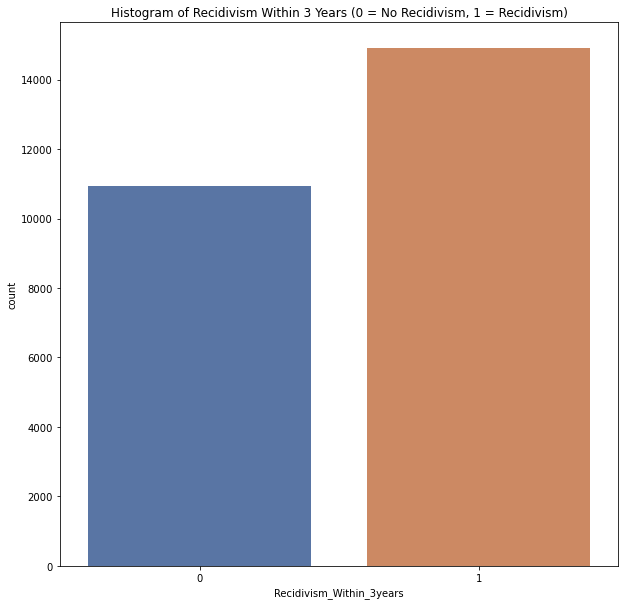

In [165]:
fig = plt.figure(figsize=(10,10))
plt.title('Histogram of Recidivism Within 3 Years (0 = No Recidivism, 1 = Recidivism)')
sns.countplot(rec_data['Recidivism_Within_3years'], palette='deep')

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Histogram of Recidivism in First Year (0 = No Recidivism, 1 = Recidivism)'}, xlabel='Recidivism_Arrest_Year1', ylabel='count'>

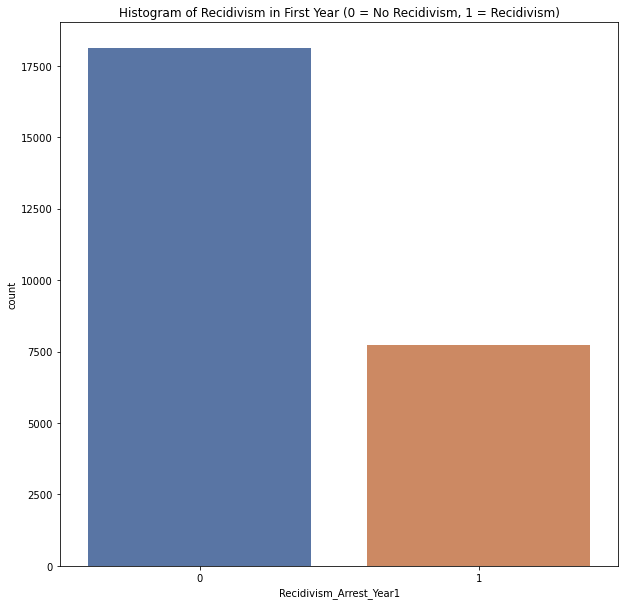

In [166]:
fig = plt.figure(figsize=(10,10))
plt.title('Histogram of Recidivism in First Year (0 = No Recidivism, 1 = Recidivism)')
sns.countplot(rec_data['Recidivism_Arrest_Year1'], palette='deep')

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Histogram of Recidivism in Second Year (0 = No Recidivism, 1 = Recidivism)'}, xlabel='Recidivism_Arrest_Year2', ylabel='count'>

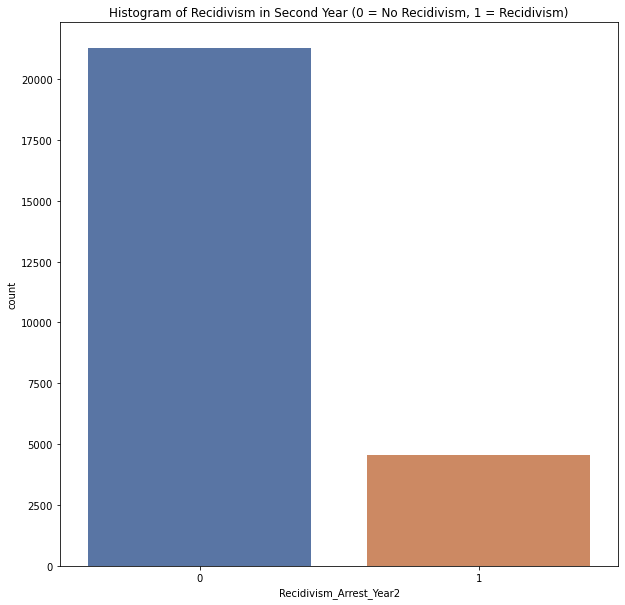

In [167]:
fig = plt.figure(figsize=(10,10))
plt.title('Histogram of Recidivism in Second Year (0 = No Recidivism, 1 = Recidivism)')
sns.countplot(rec_data['Recidivism_Arrest_Year2'], palette='deep')

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Histogram of Recidivism in Third Year (0 = No Recidivism, 1 = Recidivism)'}, xlabel='Recidivism_Arrest_Year3', ylabel='count'>

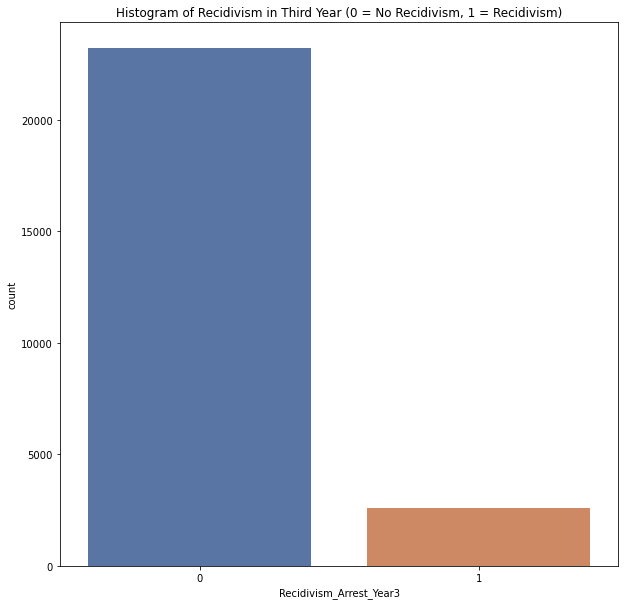

In [168]:
fig = plt.figure(figsize=(10,10))
plt.title('Histogram of Recidivism in Third Year (0 = No Recidivism, 1 = Recidivism)')
sns.countplot(rec_data['Recidivism_Arrest_Year3'], palette='deep')

In [169]:
rec_data.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
0,45,16,0.0,3.0,2,3,6,6,1,3,...,1,1,0,0,0,0,0,0,0,1
1,35,16,0.0,6.0,0,1,7,6,3,0,...,0,0,0,0,1,0,0,0,0,1
2,50,24,0.0,7.0,2,3,6,6,3,2,...,0,1,0,0,0,0,1,0,0,0
3,40,16,0.0,7.0,0,1,8,6,0,3,...,0,0,0,1,0,0,1,0,0,0
4,35,16,0.0,4.0,0,3,4,4,3,2,...,0,0,0,0,1,0,1,0,0,0


In [170]:
len(rec_data[rec_data['Recidivism_Within_3years'] == 1])/len(rec_data)

0.5768918134313915

In [171]:
len(rec_data[rec_data['Recidivism_Within_3years'] == 0])/len(rec_data)

0.4231081865686085

Text(0.5, 1.0, 'Histogram of Supervision Risk Score')

<Figure size 1080x1080 with 0 Axes>

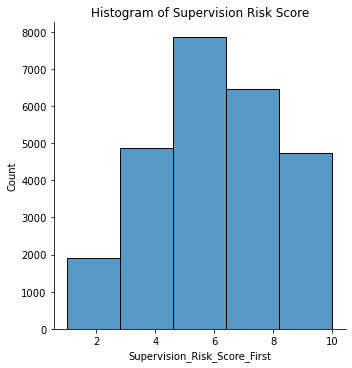

In [172]:
plt.figure(figsize=(15,15))
sns.displot(rec_data['Supervision_Risk_Score_First'], bins = 5)
plt.title("Histogram of Supervision Risk Score")

In [173]:
rec_data.describe()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
count,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,...,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000
mean,34.590091,12.361796,0.152429,6.082216,0.797368,1.471221,4.632979,3.327231,1.013006,2.218463,...,0.386414,0.200890,0.107567,0.320650,0.211922,0.032127,0.312909,0.162841,0.311515,0.212735
std,9.390456,7.133742,0.359443,2.359447,0.719782,1.214021,2.432633,2.286816,1.081233,1.889522,...,0.486937,0.400674,0.309839,0.466736,0.408678,0.176341,0.463687,0.369228,0.463122,0.409249
min,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,6.000000,0.000000,4.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,12.000000,0.000000,6.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,18.000000,0.000000,8.000000,1.000000,3.000000,7.000000,6.000000,2.000000,4.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,50.000000,25.000000,1.000000,10.000000,2.000000,3.000000,9.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Countplot of Gender Distribution (0=Female, 1=Male)'}, xlabel='Male', ylabel='count'>

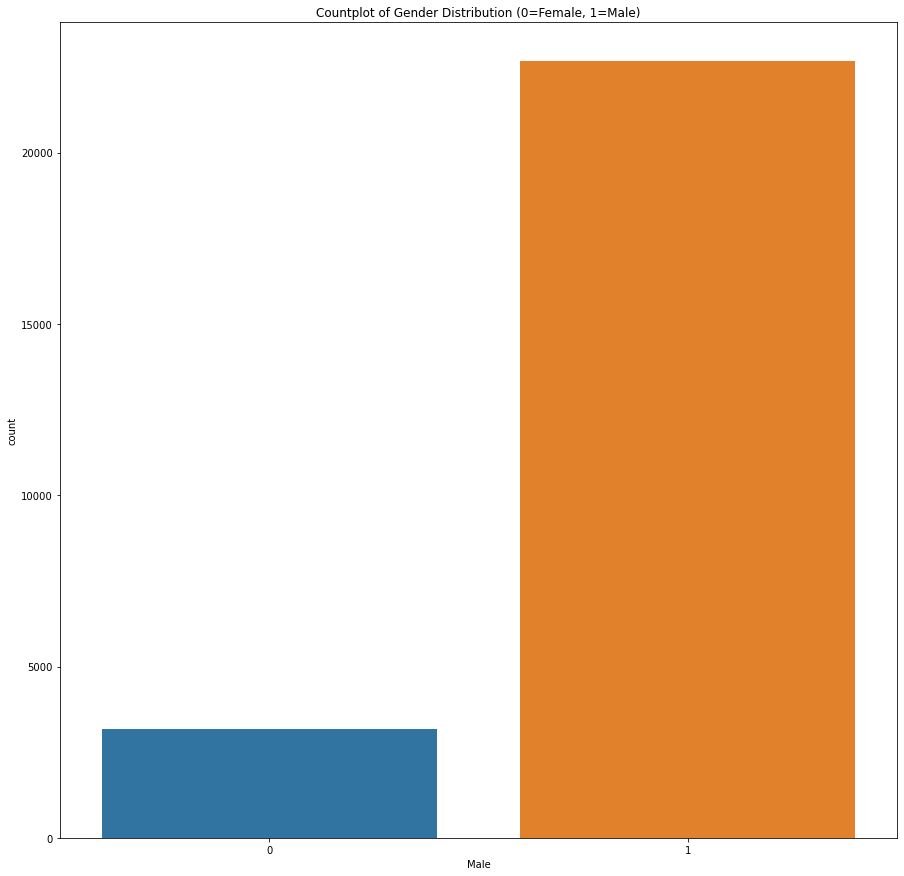

In [175]:
plt.figure(figsize=(15,15))
plt.title('Countplot of Gender Distribution (0=Female, 1=Male)')
sns.countplot(rec_data['Male'])

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Countplot of Race Distribution (0=Black, 1=White)'}, xlabel='WHITE', ylabel='count'>

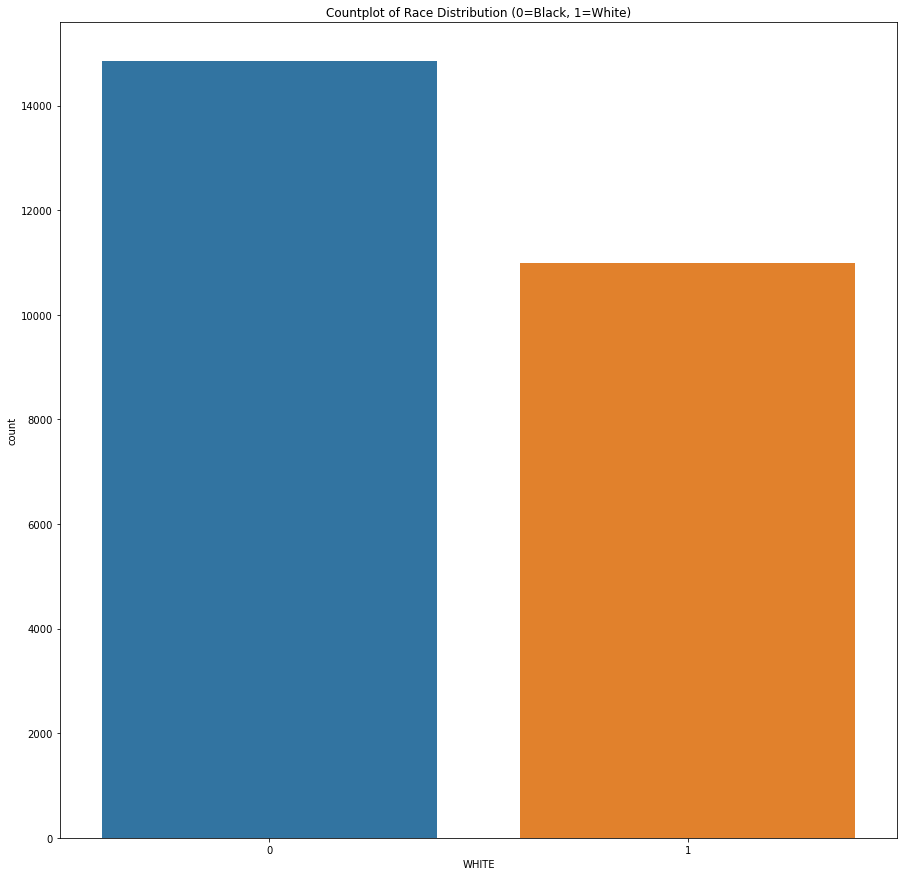

In [176]:
plt.figure(figsize=(15,15))
plt.title('Countplot of Race Distribution (0=Black, 1=White)')
sns.countplot(rec_data['WHITE'])

In [177]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

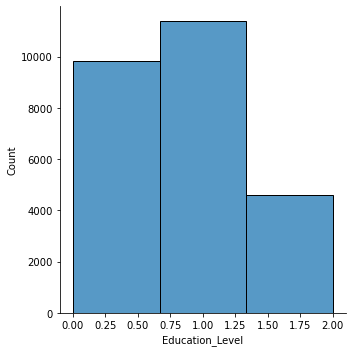

In [178]:
sns.displot(rec_data['Education_Level'], bins = 3)

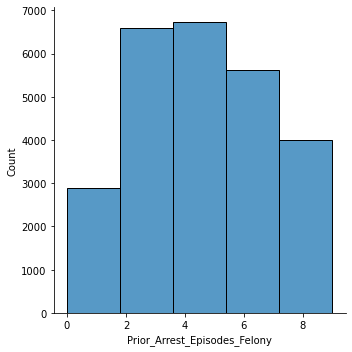

In [179]:
sns.displot(rec_data['Prior_Arrest_Episodes_Felony'], bins = 5)

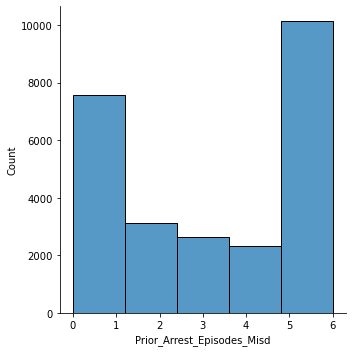

In [180]:
sns.displot(rec_data['Prior_Arrest_Episodes_Misd'], bins = 5)

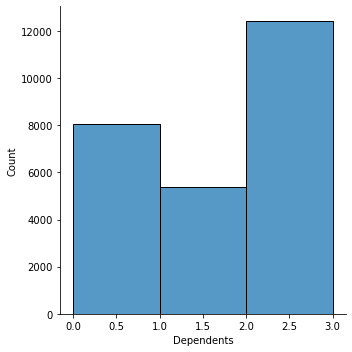

In [181]:
sns.displot(rec_data['Dependents'], bins = 3)

In [182]:
rec_data_norecidivism = rec_data[rec_data['Recidivism_Within_3years'] == 0]

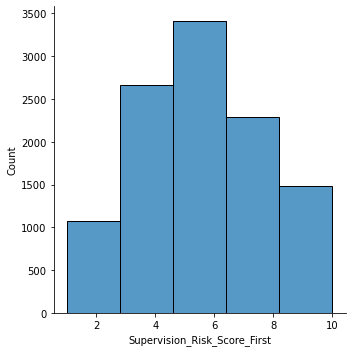

In [183]:
sns.displot(rec_data_norecidivism['Supervision_Risk_Score_First'], bins = 5)

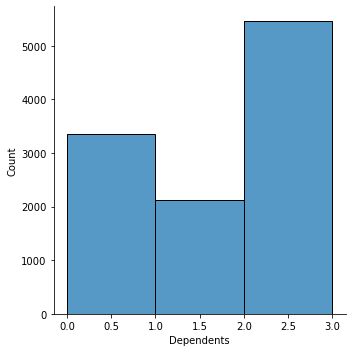

In [184]:
sns.displot(rec_data_norecidivism['Dependents'], bins = 3)

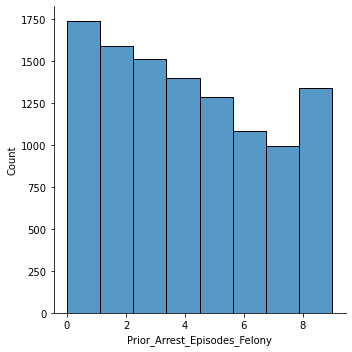

In [185]:
sns.displot(rec_data_norecidivism['Prior_Arrest_Episodes_Felony'], bins = 8)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Male', ylabel='count'>

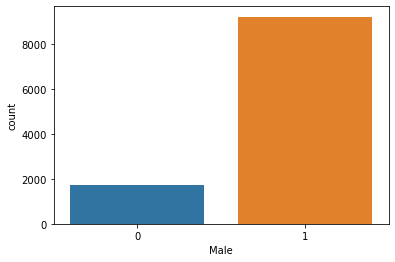

In [186]:
sns.countplot(rec_data_norecidivism['Male'])

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WHITE', ylabel='count'>

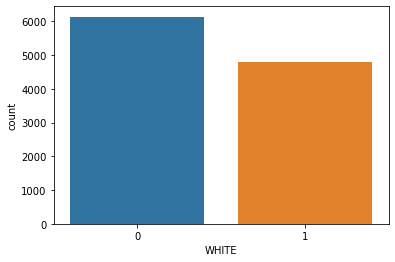

In [187]:
sns.countplot(rec_data_norecidivism['WHITE'])

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Violent/Sex Offense', ylabel='count'>

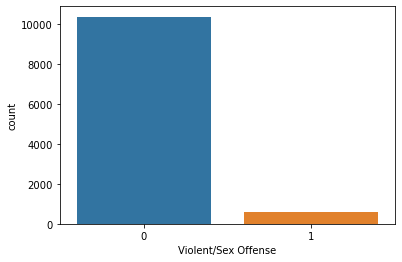

In [188]:
sns.countplot(rec_data_norecidivism['Violent/Sex Offense'])

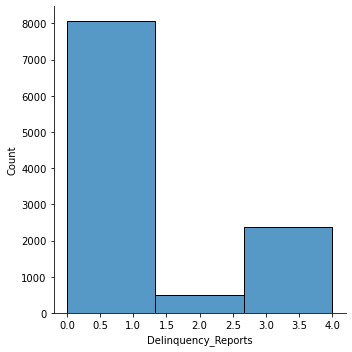

In [189]:
sns.displot(rec_data_norecidivism['Delinquency_Reports'],bins =3)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gang_Affiliated', ylabel='count'>

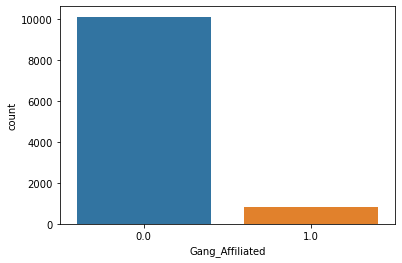

In [190]:
sns.countplot(rec_data_norecidivism['Gang_Affiliated'])

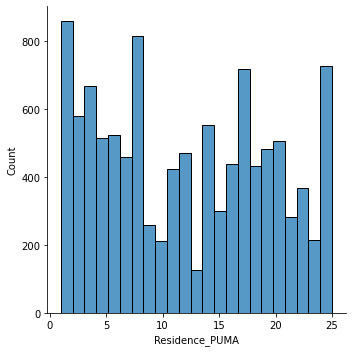

In [191]:
sns.displot(rec_data_norecidivism['Residence_PUMA'])

In [192]:
rec_data_recidivism = rec_data[rec_data['Recidivism_Within_3years'] == 1]

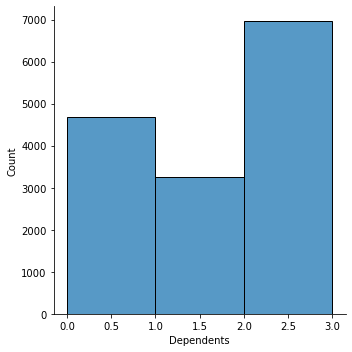

In [193]:
sns.displot(rec_data_recidivism['Dependents'], bins = 3)

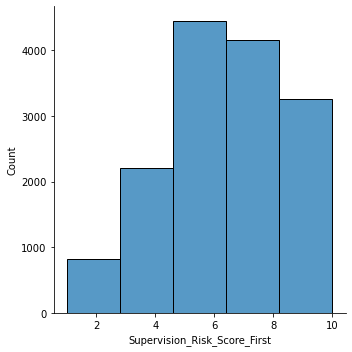

In [194]:
sns.displot(rec_data_recidivism['Supervision_Risk_Score_First'], bins = 5)

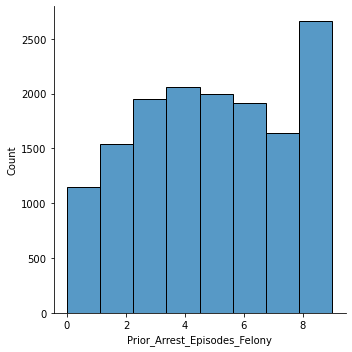

In [195]:
sns.displot(rec_data_recidivism['Prior_Arrest_Episodes_Felony'], bins = 8)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Male', ylabel='count'>

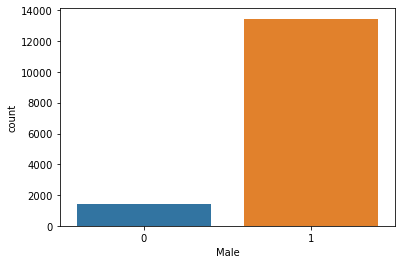

In [196]:
sns.countplot(rec_data_recidivism['Male'])

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WHITE', ylabel='count'>

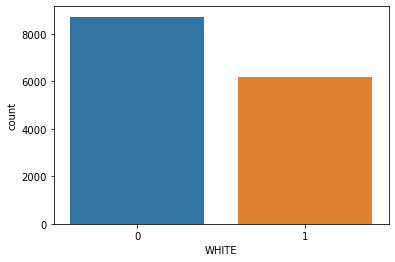

In [197]:
sns.countplot(rec_data_recidivism['WHITE'])

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Violent/Sex Offense', ylabel='count'>

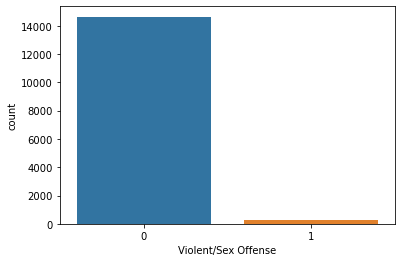

In [198]:
sns.countplot(rec_data_recidivism['Violent/Sex Offense'])

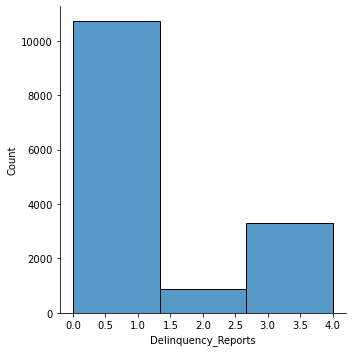

In [199]:
sns.displot(rec_data_recidivism['Delinquency_Reports'],bins = 3)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gang_Affiliated', ylabel='count'>

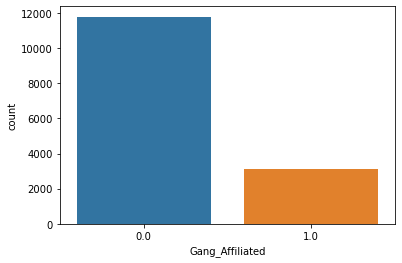

In [200]:
sns.countplot(rec_data_recidivism['Gang_Affiliated'])

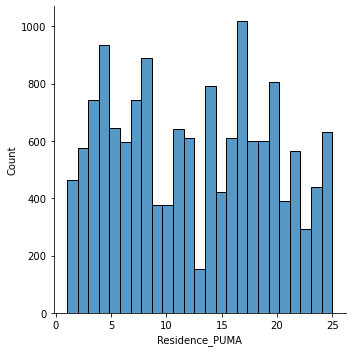

In [201]:
sns.displot(rec_data_recidivism['Residence_PUMA'])

In [202]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age_at_Release                                     25835 non-null  int32  
 1   Residence_PUMA                                     25835 non-null  int64  
 2   Gang_Affiliated                                    25835 non-null  float64
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Education_Level                                    25835 non-null  int32  
 5   Dependents                                         25835 non-null  int32  
 6   Prior_Arrest_Episodes_Felony                       25835 non-null  int32  
 7   Prior_Arrest_Episodes_Misd                         25835 non-null  int32  
 8   Prior_Arrest_Episodes_Violent                      25835 non-null  int32  
 9   Prior_

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()

In [205]:
X = rec_data.drop(['Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year2'], axis=1)

In [206]:
y1 = rec_data['Recidivism_Within_3years']

In [207]:
y2 = rec_data['Recidivism_Arrest_Year1']

In [208]:
y3 = rec_data['Recidivism_Arrest_Year2']

In [209]:
y4 = rec_data['Recidivism_Arrest_Year3']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1,test_size = 0.25, random_state = 101)

In [212]:
X_train1.head()

,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,...,Standard Supervision,Drug Offense,Other Offense,Property Offense,Violent/Non-Sex Offense,Violent/Sex Offense,1-2 years in prison,2-3+ years in prison,1- years in prison,3+ years in prison
13040,50,15,0.0,1.0,1,0,8,2,0,3,...,1,0,0,1,0,0,0,0,1,0
24876,30,4,0.0,5.0,0,3,9,4,0,4,...,1,0,0,1,0,0,0,0,1,0
25471,30,22,0.0,4.0,2,1,5,6,1,3,...,1,0,0,0,0,0,0,0,1,0
5055,50,25,0.0,1.0,1,3,7,2,1,3,...,1,1,0,0,0,0,0,0,0,1
22884,40,3,1.0,4.0,2,3,8,6,3,2,...,1,0,0,0,0,0,0,0,1,0


In [220]:
import xgboost as xgb

In [221]:
model = xgb.XGBClassifier()

In [222]:
X_train1 = scaler.fit_transform(X_train1)

In [223]:
model.fit(X_train1, y_train1)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
X_test1 = scaler.fit_transform(X_test1)

In [225]:
y_pred1 = model.predict(X_test1)

In [226]:
y_pred1[0]

1

In [227]:
y_test1.iloc(0)

In [228]:
y_pred1[3]

1

In [229]:
prediction_probabilities = []

for i in y_pred1:
    
    prediction_probabilities.append((i[1]*100).round())

IndexError: invalid index to scalar variable.

In [230]:
prediction_probabilities

[]

In [231]:
from sklearn.metrics import classification_report, confusion_matrix

In [232]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2667
           1       0.80      0.82      0.81      3792

    accuracy                           0.77      6459
   macro avg       0.77      0.76      0.77      6459
weighted avg       0.77      0.77      0.77      6459



In [233]:
cm_reg_xgboost = confusion_matrix(y_test1,y_pred1)

In [234]:
optimized_model = xgb.XGBClassifier(n_estimators = 59, max_depth = 6, subsample = 0.7, 
                                   min_child_weight = 5, learning_rate=0.1, gamma = 6)

In [235]:
optimized_model.fit(X_train1, y_train1)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=59, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [236]:
y_pred2 = optimized_model.predict(X_test1)

In [237]:
print(classification_report(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2667
           1       0.80      0.85      0.82      3792

    accuracy                           0.79      6459
   macro avg       0.78      0.77      0.78      6459
weighted avg       0.79      0.79      0.79      6459



In [238]:
cm_optimized_xgboost = confusion_matrix(y_test1, y_pred2)

In [239]:
from sklearn.metrics import ConfusionMatrixDisplay

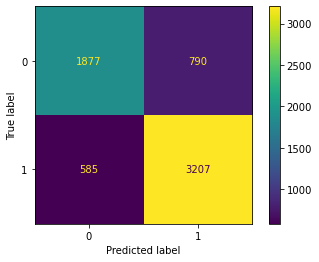

In [240]:
ConfusionMatrixDisplay(cm_optimized_xgboost).plot()

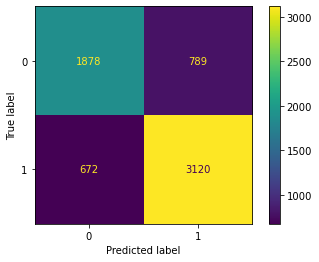

In [241]:
ConfusionMatrixDisplay(cm_reg_xgboost).plot()

In [242]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y1,test_size = 0.25, random_state = 101)

In [243]:
optimized_model.fit(X_train2, y_train2)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=59, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
rf = RandomForestClassifier(n_estimators = 59)

In [247]:
rf.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=59)

In [248]:
y_pred5 = rf.predict(X_test2)

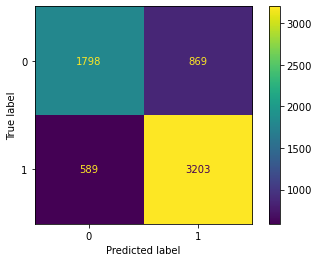

In [249]:
ConfusionMatrixDisplay(confusion_matrix(y_test2,y_pred5)).plot()

In [250]:
y_pred3 = optimized_model.predict(X_test2)

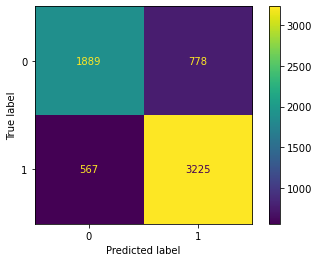

In [251]:
ConfusionMatrixDisplay(confusion_matrix(y_test2,y_pred3)).plot()

In [252]:
print(classification_report(y_test2,y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2667
           1       0.81      0.85      0.83      3792

    accuracy                           0.79      6459
   macro avg       0.79      0.78      0.78      6459
weighted avg       0.79      0.79      0.79      6459



In [253]:
model.fit(X_train2, y_train2)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
y_pred4 = model.predict(X_test2)

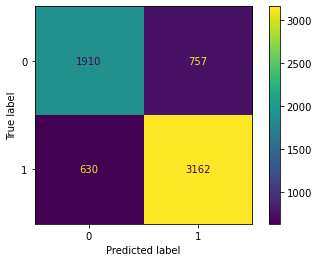

In [255]:
ConfusionMatrixDisplay(confusion_matrix(y_test2,y_pred4)).plot()

In [256]:
print(classification_report(y_test2,y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      2667
           1       0.81      0.83      0.82      3792

    accuracy                           0.79      6459
   macro avg       0.78      0.78      0.78      6459
weighted avg       0.78      0.79      0.78      6459



In [257]:
X_train1.shape

(19376, 59)

In [258]:
model2 = Sequential()

In [259]:
model2.add(Dense(60, activation='relu'))

In [260]:
model2.add(Dense(30, activation='relu'))

In [261]:
model2.add(Dense(15, activation='relu'))

In [262]:
model2.add(Dense(7, activation='relu'))

In [263]:
model2.add(Dense(1, activation='sigmoid'))

In [264]:
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [265]:
model2.fit(X_train1, y_train1, epochs = 100)

Epoch 1/100
606/606 [==============================] - 2s 2ms/step - loss: 0.5439
Epoch 2/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4848
Epoch 3/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4724
Epoch 4/100
606/606 [==============================] - 2s 3ms/step - loss: 0.4624
Epoch 5/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4540
Epoch 6/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4469
Epoch 7/100
606/606 [==============================] - 2s 3ms/step - loss: 0.4387
Epoch 8/100
606/606 [==============================] - 2s 4ms/step - loss: 0.4320A: 0s
Epoch 9/100
606/606 [==============================] - 2s 3ms/step - loss: 0.4254
Epoch 10/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4173
Epoch 11/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4099
Epoch 12/100
606/606 [==============================] - 1s 2ms/step - loss: 0.4028A:
Epoch 

In [266]:
predictions_2 = model2.predict(X_test1)

In [267]:
predictions_2[0]

array([0.9999216], dtype=float32)

In [268]:
predictions_2_official = []
for i in predictions_2:
    
    if i >= 0.5:
        
        predictions_2_official.append(1)
        
    else:
        
        predictions_2_official.append(0)

In [269]:
predictions_2_official

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [270]:
print(classification_report(y_test1, predictions_2_official))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      2667
           1       0.76      0.72      0.74      3792

    accuracy                           0.70      6459
   macro avg       0.69      0.70      0.70      6459
weighted avg       0.71      0.70      0.70      6459



In [271]:
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y1, test_size=0.2, random_state=1)
X_train11, X_val11, y_train11, y_val11 = train_test_split(X_train11, y_train11, test_size=0.25, random_state=1) 

In [272]:
X_train11 = scaler.fit_transform(X_train11)

In [273]:
X_test11 = scaler.fit_transform(X_test11)

In [274]:
X_val11 = scaler.fit_transform(X_val11)

In [275]:
model_path = "recidivism_model.json"

In [276]:
model_2_new = Sequential()

In [277]:
model_2_new.add(Dense(59, activation='relu'))

In [278]:
model_2_new.add(Dense(29, activation='relu'))

In [279]:
model_2_new.add(Dense(15, activation='relu'))

In [280]:
model_2_new.add(Dense(8, activation='relu'))

In [281]:
model_2_new.add(Dense(1, activation='sigmoid'))

In [282]:
model_2_new.compile(loss='binary_crossentropy', optimizer='adam')

In [283]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, TensorBoard, EarlyStopping

In [284]:
callbacks = [ModelCheckpoint(model_path, verbose=1, save_best_only=True),
            ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5, min_lr = 1e-7, verbose=1),
            EarlyStopping(monitor='val_loss', patience = 8, restore_best_weights = False)]

In [285]:
model_2_new.fit(
    
    X_train11, y_train11,
    epochs = 100,
    validation_data = (X_val11, y_val11),
    callbacks = callbacks

)

Epoch 1/100
485/485 [==============================] - 2s 3ms/step - loss: 0.5490 - val_loss: 0.5090

Epoch 00001: val_loss improved from inf to 0.50896, saving model to recidivism_model.json
INFO:tensorflow:Assets written to: recidivism_model.json\assets
Epoch 2/100
485/485 [==============================] - 2s 4ms/step - loss: 0.4834 - val_loss: 0.5027

Epoch 00002: val_loss improved from 0.50896 to 0.50269, saving model to recidivism_model.json
INFO:tensorflow:Assets written to: recidivism_model.json\assets
Epoch 3/100
485/485 [==============================] - 2s 4ms/step - loss: 0.4660 - val_loss: 0.5055

Epoch 00003: val_loss did not improve from 0.50269
Epoch 4/100
485/485 [==============================] - 1s 3ms/step - loss: 0.4557 - val_loss: 0.5042

Epoch 00004: val_loss did not improve from 0.50269
Epoch 5/100
485/485 [==============================] - 1s 3ms/step - loss: 0.4439 - val_loss: 0.5033

Epoch 00005: val_loss did not improve from 0.50269
Epoch 6/100
485/485 [====

In [286]:
recidivism_percentages = model_2_new.predict(X_test11)

In [287]:
recidivism_percentages

array([[0.17540786],
       [0.6116612 ],
       [0.9380477 ],
       ...,
       [0.9199964 ],
       [0.4977259 ],
       [0.44847092]], dtype=float32)

In [288]:
recidivism_predictions = []

In [289]:
for i in recidivism_percentages:
    
    if i >= 0.5:
        
        recidivism_predictions.append(1)
        
    else:
        
        recidivism_predictions.append(0)

In [290]:
print(classification_report(y_test11, recidivism_predictions))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69      2229
           1       0.76      0.80      0.78      2938

    accuracy                           0.75      5167
   macro avg       0.74      0.74      0.74      5167
weighted avg       0.74      0.75      0.74      5167



In [324]:
from sklearn.linear_model import LogisticRegression

In [325]:
mod = LogisticRegression()

In [326]:
mod.fit(X_train11, y_train11)

LogisticRegression()

In [327]:
pred = mod.predict_proba(X_test11)

In [328]:
pred

array([[0.79374542, 0.20625458],
       [0.37513013, 0.62486987],
       [0.42119477, 0.57880523],
       ...,
       [0.19611058, 0.80388942],
       [0.40918178, 0.59081822],
       [0.58156923, 0.41843077]])

In [329]:
preddys = []
for i in pred:
    
    if i[1] >= 0.5:
        
        preddys.append(1)
        
    else:
        
        preddys.append(0)

In [330]:
print(classification_report(y_test11,preddys))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2229
           1       0.76      0.83      0.79      2938

    accuracy                           0.76      5167
   macro avg       0.75      0.75      0.75      5167
weighted avg       0.76      0.76      0.75      5167



In [331]:
print('hello')

hello


Custom K_Nearest_Neighbors Algorithm

In [332]:
from sklearn.neighbors import KNeighborsClassifier

In [333]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [334]:
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=9)

In [335]:
y_pred6 = knn.predict(X_test2)

In [336]:
y_pred6

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

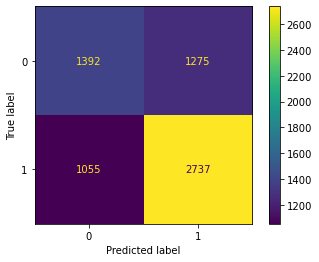

In [337]:
ConfusionMatrixDisplay(confusion_matrix(y_test2,y_pred6)).plot()